In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [2]:
consumer_key="vLPDq6d3VcpIDZsKByloFUdWQ"
consumer_scret="R6fYDY6llVIZhJ2CO9yuvdBAllCi8brni1zktePxwNErDLsS8O"
access_token="1377948754658009093-eVkn0pcjLhQKYcnBQAHF0G7bpFgBtY"
access_token_scret="xq7AjYpag5pYddaAtT6P2osHvCQjTgGsfCKR5YnV28S6x"

In [3]:
auth=tw.OAuthHandler(consumer_key,consumer_scret)
auth.set_access_token(access_token,access_token_scret)
api=tw.API(auth,wait_on_rate_limit=True)

In [4]:
search_words="climate"+"change"
date_since="2020-11-01"

In [5]:
tweets=tw.Cursor(api.search,q=search_words,lang="en",since=date_since).items(1000)

In [6]:
all_tweets = [tweet.text for tweet in tweets]

all_tweets[:10]

['RT @MikeHudema: Here is a 90 second video summary of climate change since 1850. Notice a pattern?\n\nTime to treat #climatechange like the #c…',
 'RT @TheBabita: Pleasure to brief #LDCs Ambassadors on #climatechange as part of Inputs on the Road to Doha. 30% or US$ 2.5B of @theGCF fund…',
 '@ImranKhanPTI why are you asking for funding? for #climatechange ?',
 'RT @GeraldKutney: Something is rotten in the state of Denial.\n\n#ClimateCrisis #climatechange',
 'RT @GeraldKutney: Isaac Asimov: "Anti-intellectualism has been a constant thread winding its way through our political and cultural life, n…',
 'RT @EarthAccounting: Once #ClimateChange deniers, the #agriculture industry positions itself as part of the solution https://t.co/G9qijiQPo…',
 'RT @CLEANBOSS2: #ADAPT #ADOPT #SHAPEUP\n2 #Environment Challenges\nFast changing circumstances KeepUp with pace take back control Prioritize…',
 '@thinks_about_it @Climatehope2 @YootDigmeMusic @TFFPrisoner @edcranium @CafeLiminal @Pylon54 @ParisO

In [7]:
new_search_words=search_words+"-filter:retweets"
date_since="2020-11-01"
tweets=tw.Cursor(api.search,q=new_search_words,lang="en",since=date_since).items(1000)

In [8]:
all_tweets1 = [tweet.text for tweet in tweets]

all_tweets1[:10]

['@ImranKhanPTI why are you asking for funding? for #climatechange ?',
 '@thinks_about_it @Climatehope2 @YootDigmeMusic @TFFPrisoner @edcranium @CafeLiminal @Pylon54 @ParisOrtizWines… https://t.co/fGUMaX29BT',
 'The planet is far too precious for mankind to ‘second guess’ Mother Nature or ‘hope for the best’. A significant pr… https://t.co/oBRsXGiMsY',
 '@HumanRightsAni1 I think this is partly what makes it increasingly difficult for the public to decide what to trust… https://t.co/yinuZx631d',
 '@TFFPrisoner @edcranium @thinks_about_it @CafeLiminal @Climatehope2 @Pylon54 @ParisOrtizWines "progress"?\nFaux-gree… https://t.co/YDFQXLWo6V',
 'The paper, published in the journal @NatureClimate, estimates that global farming productivity has fallen 21% since… https://t.co/Bw0P38qMMn',
 '@fordnation has failed us on so many levels from the wasted $ on carbon tax fight, #LCBO #Hydro CEO. Cuts to #PHO… https://t.co/9AwkeXtHFa',
 'Special Envoy for Climate Affairs of #Bahrain 🇧🇭, H.E. Dr. Moham

In [9]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", txt).split())
print("ututu")

ututu


In [10]:
all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]
all_tweets_no_urls[:10]

['RT MikeHudema Here is a 90 second video summary of climate change since 1850 Notice a pattern Time to treat climatechange like the c',
 'RT TheBabita Pleasure to brief LDCs Ambassadors on climatechange as part of Inputs on the Road to Doha 30 or US 2 5B of theGCF fund',
 'ImranKhanPTI why are you asking for funding for climatechange',
 'RT GeraldKutney Something is rotten in the state of Denial ClimateCrisis climatechange',
 'RT GeraldKutney Isaac Asimov Anti intellectualism has been a constant thread winding its way through our political and cultural life n',
 'RT EarthAccounting Once ClimateChange deniers the agriculture industry positions itself as part of the solution',
 'RT CLEANBOSS2 ADAPT ADOPT SHAPEUP 2 Environment Challenges Fast changing circumstances KeepUp with pace take back control Prioritize',
 'thinks about it Climatehope2 YootDigmeMusic TFFPrisoner edcranium CafeLiminal Pylon54 ParisOrtizWines',
 'RT MikeHudema Here is a 90 second video summary of climate change sinc

In [11]:
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]
words_in_tweet[:2]

[['rt',
  'mikehudema',
  'here',
  'is',
  'a',
  '90',
  'second',
  'video',
  'summary',
  'of',
  'climate',
  'change',
  'since',
  '1850',
  'notice',
  'a',
  'pattern',
  'time',
  'to',
  'treat',
  'climatechange',
  'like',
  'the',
  'c'],
 ['rt',
  'thebabita',
  'pleasure',
  'to',
  'brief',
  'ldcs',
  'ambassadors',
  'on',
  'climatechange',
  'as',
  'part',
  'of',
  'inputs',
  'on',
  'the',
  'road',
  'to',
  'doha',
  '30',
  'or',
  'us',
  '2',
  '5b',
  'of',
  'thegcf',
  'fund']]

In [12]:
# List of all words across tweets
all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(15)

[('rt', 760),
 ('the', 547),
 ('climatechange', 455),
 ('a', 429),
 ('to', 428),
 ('of', 398),
 ('is', 338),
 ('climate', 277),
 ('and', 253),
 ('on', 225),
 ('in', 212),
 ('geraldkutney', 155),
 ('that', 144),
 ('for', 139),
 ('it', 139)]

In [13]:
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

clean_tweets_no_urls.head(15)

,words,count
0,rt,760
1,the,547
2,climatechange,455
3,a,429
4,to,428
5,of,398
6,is,338
7,climate,277
8,and,253
9,on,225


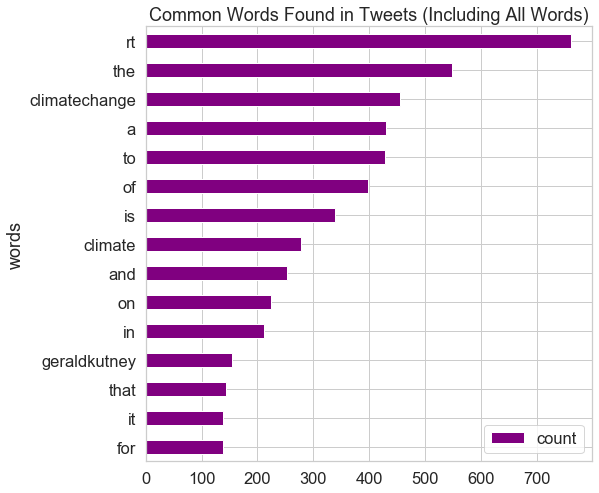

In [14]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
stop_words = set(stopwords.words('english'))

# View a few words from the set
list(stop_words)[0:100]

['if',
 'were',
 'yourselves',
 'has',
 'no',
 'being',
 'where',
 'any',
 'each',
 "wasn't",
 'what',
 'will',
 'but',
 "you've",
 'while',
 "needn't",
 'through',
 'o',
 "it's",
 'on',
 'those',
 "shan't",
 "haven't",
 'mightn',
 'in',
 'over',
 "shouldn't",
 'doesn',
 'as',
 'with',
 'have',
 'not',
 'didn',
 'few',
 'when',
 'was',
 "mightn't",
 'me',
 'my',
 'd',
 'm',
 'above',
 'nor',
 'now',
 'it',
 'and',
 'out',
 's',
 'about',
 'ma',
 'y',
 'then',
 'a',
 'which',
 'do',
 'hers',
 'further',
 'be',
 'down',
 'all',
 'you',
 "didn't",
 "she's",
 'been',
 'up',
 'or',
 'ours',
 'that',
 'myself',
 'we',
 'should',
 'of',
 'an',
 "you'd",
 "hasn't",
 'same',
 'his',
 'here',
 'so',
 't',
 "won't",
 'by',
 'needn',
 'couldn',
 'she',
 'he',
 'll',
 'hasn',
 'shan',
 'weren',
 'more',
 'again',
 "don't",
 "aren't",
 'these',
 'doing',
 'from',
 'because',
 'why',
 'mustn']

In [17]:
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

tweets_nsw[1]

['rt',
 'thebabita',
 'pleasure',
 'brief',
 'ldcs',
 'ambassadors',
 'climatechange',
 'part',
 'inputs',
 'road',
 'doha',
 '30',
 'us',
 '2',
 '5b',
 'thegcf',
 'fund']

In [21]:
all_words_nsw = list(itertools.chain(*tweets_nsw))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(15)


[('rt', 760),
 ('climatechange', 455),
 ('climate', 277),
 ('geraldkutney', 155),
 ('change', 102),
 ('c', 88),
 ('like', 76),
 ('time', 75),
 ('summary', 71),
 ('since', 70),
 ('new', 70),
 ('90', 66),
 ('second', 66),
 ('amp', 65),
 ('mikehudema', 64)]

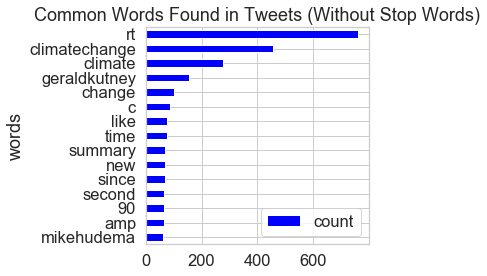

In [22]:
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(4, 4))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="blue")

ax.set_title("Common Words Found in Tweets (Without Stop Words)")

plt.show()